## *importation des biblios necessaire*

In [17]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## generation de notre dataset

In [3]:
x,y = make_regression(n_samples=1000,n_features = 1, noise=10)
y = y.reshape((1000,1))
#donc pour test aussi pour un problem on lineair je peut faire par exenple y = y +abs(y) ect 
# donc je veut choisir y = y**2 just pour avoir un effet polynomial

In [4]:
X = np.hstack((x,np.ones(x.shape)))
theta= np.random.randn(2,1)

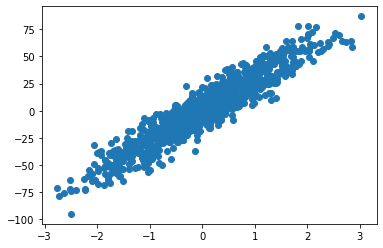

In [5]:
plt.scatter(x,y)

# GRADIENT DESCENTE

## creation du Modèle

In [6]:
def model(X,theta):
    return X.dot(theta)

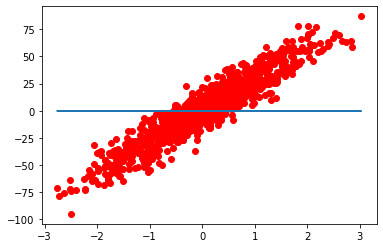

In [7]:
plt.plot(x,model(X,theta))
plt.scatter(x,y,c="r")

## creation de la fonction coût

In [8]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m)*(np.sum((model(X,theta)-y)**2))

## creation de la fonction de qui calcule le gradient

In [9]:
def grad(X,y,theta):
    m= len(y)
    return 1/m*(X.T.dot(model(X,theta)-y))

## creation de la fonction qui execute l'algorithme de GD

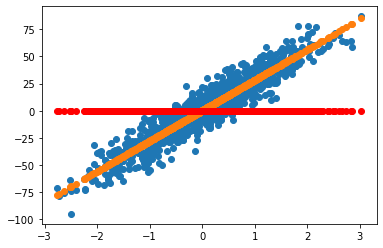

In [10]:
def gradient_descent(X,y,theta,alpha,itterations):
    cost_history = np.zeros(itterations)
    for i in range(itterations):
        cost_history[i] = cost_function(X,y,theta)
        theta = theta - alpha*grad(X,y,theta)
    return theta,cost_history
theta2,cost_history = gradient_descent(X,y,theta,0.001,10000)
# je veut etuliser une theta3 trouver a partir des equations normale
plt.scatter(x,y)
plt.scatter(x,model(X,theta2))
plt.scatter(x,model(X,theta),c="r")

### la variation de la fonction coût et aussi le calcule de la coefficient de determination

0.8877549216731428

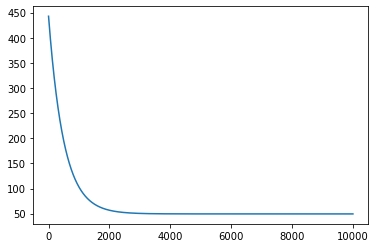

In [11]:
plt.plot(cost_history)
R1 = 1- np.sum((y-model(X,theta))**2)/np.sum((y-y.mean())**2)
R1
# remarquer que pour le theta initiale R2 enverant 0.01541145654
R2 = 1- np.sum((y-model(X,theta2))**2)/np.sum((y-y.mean())**2)
R2
# alors que pour le theta2 calculer d'après le gradient descente R2 enverant 0.978547895452

# NORMAL EQUATINOS

    On a d'apres les equations normale
` theta = (X.T*X)'*X.T*Y `

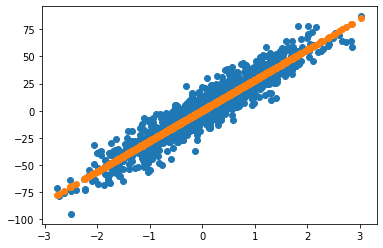

In [12]:
theta3 = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
plt.scatter(x,y)
plt.scatter(x,model(X,theta3))